## Expore mixed precision with the number of nearest neighbors [N = 40K]

In [25]:
import pandas as pd
import numpy as np

range_values=[0.026270, 0.017512, 0.014290, 0.078809, 0.052537, 0.042869, 0.210158, 0.140098, 0.114318]
nu=[0.5, 1.5, 2.5, 0.5, 1.5, 2.5, 0.5, 1.5, 2.5]
range_str = ['Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'High', 'High']
dims=[2, 4, 8]

N=40000
bc=400
m_bv=[5, 10, 20, 30, 60, 90, 120, 150, 180, 210, 240, 270]
n_array=[1, 2, 3, 4, 5, 6, 7, 8, 9]
precision=["float", "double"]

def read_logl(precision):
    data = []
    for n in n_array:
        _data_part = []
        for d in dims:
            _data_part_d = []
            for m in m_bv:
                _nu = nu[n-1]
                _range = range_values[n-1]
                if _nu == 0.5:
                    mat = "12"
                elif _nu == 1.5:
                    mat = "32"
                elif _nu == 2.5:
                    mat = "52"
                file_path_template =f"../../log/kl-matern-simu/logFile_numPointsTotal40000_numBlocksTotal400_m{m}_seed0_isScaled1_kl-Matern{mat}-simu-{precision}-{n}-dim{d}.csv"
                # read the file
                df = pd.read_csv(file_path_template)
                _logl = df["optimized_log_likelihood"].values
                _data_part_d.append(_logl)
            _data_part.append(_data_part_d)
        data.append(_data_part)
    return data

single_data_llh = read_logl("float")
double_data_llh = read_logl("double")

/tmp/ipykernel_1628207/3133740610.py:60: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


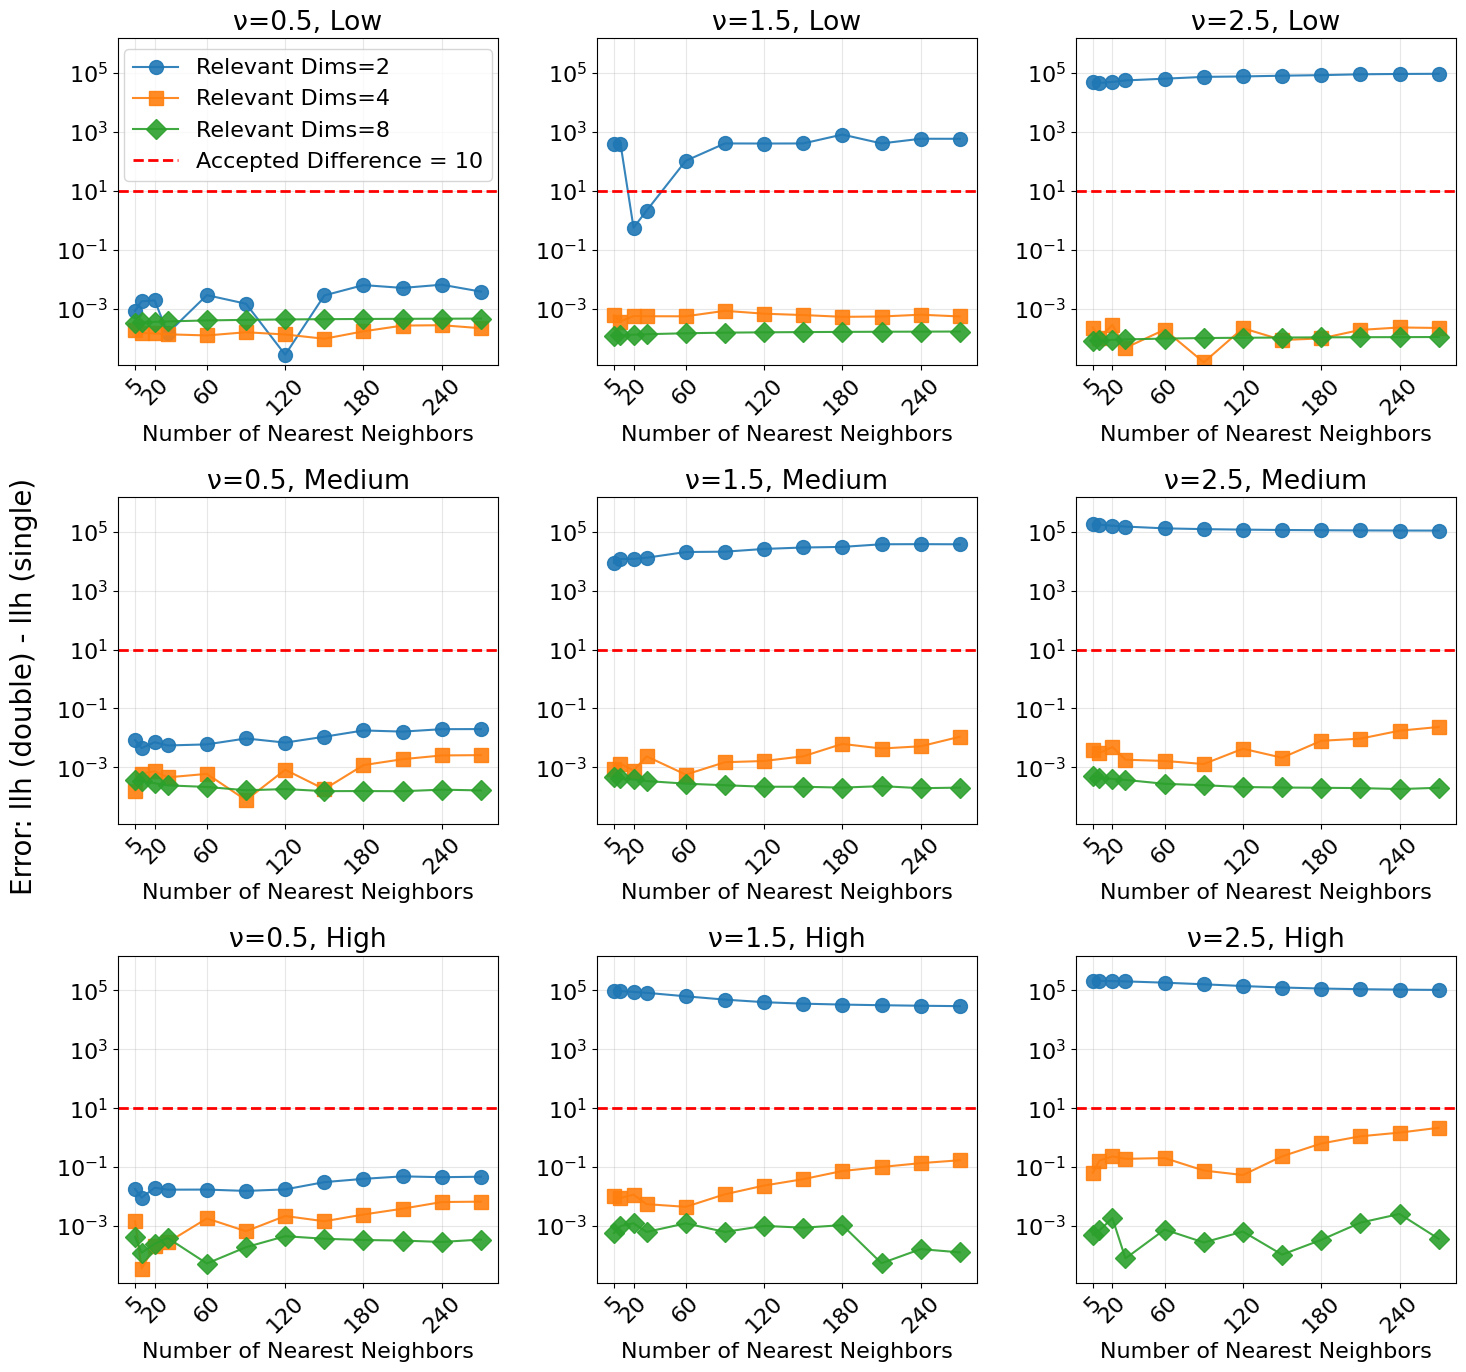

In [27]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

# Create 9 subplots for comparison
fig, axes = plt.subplots(3, 3, figsize=(15, 14),  constrained_layout=True)
# fig.suptitle('Comparison of Single vs Double Precision KL Values', fontsize=16)

# Flatten axes for easier indexing
axes = axes.flatten()
markers = ['o', 's', 'D', 'v', '^', 'P', 'H', 'X', 'd']

# Calculate the global min and max for consistent y-axis range
all_differences = []
for i in range(9):
    single_kl = single_data_llh[i]
    double_kl = double_data_llh[i]
    for j in range(len(dims)):
        _differences = np.abs(np.array(double_kl[j]) - np.array(single_kl[j]))  # Use absolute values for log scale
        all_differences.extend(_differences)

# Set global y-axis limits for log scale
y_min = min(all_differences)
y_max = max(all_differences)

for i in range(9):
    ax = axes[i]
    
    # Get the data for this parameter set
    single_kl = single_data_llh[i]
    double_kl = double_data_llh[i]
    
    # Plot absolute difference (required for log scale)
    for j in range(len(dims)):    
        differences = np.abs(np.array(double_kl[j]) - np.array(single_kl[j]))
        ax.plot(m_bv, differences, marker = markers[j], linestyle = '-', alpha=0.9, markersize=10, label=f'Relevant Dims={dims[j]}')
    
    ax.axhline(y=10, xmax=max(m_bv), color='red', linestyle='--', linewidth=2, label='Accepted Difference = 10')
    # Set logarithmic y-axis
    ax.set_yscale('log')
    
    # Set consistent y-axis range for all subplots
    ax.set_ylim(y_min * 0.8, y_max * 7.2)  # Add small buffer
    
    # Set labels and title
    ax.set_xlabel('Number of Nearest Neighbors')    
    ax.set_title(f'ν={nu[i]}, {range_str[i]}')
    if i == 0:
        ax.legend(loc='upper center')
    ax.grid(True, alpha=0.3)
    
    # Set x-axis to show all m_bv values
    ax.set_xticks(m_bv[::2])  # Show every other tick to avoid crowding
    ax.tick_params(axis='x', rotation=45)

# Add figure-wide y-label with custom positioning
# fig.text(-0.01, 0.5, 'llh (double) - llh (single)', va='center', rotation='vertical', fontsize=20)
fig.supylabel('Error: llh (double) - llh (single)', fontsize=20, x=0.02)

plt.tight_layout()
plt.savefig('./fig/GPspatial_dims.pdf', dpi=300)
plt.show()

## Explore the mixed precision with the number of locations

In [30]:
import pandas as pd
import numpy as np

range_values=[0.026270, 0.017512, 0.014290, 0.078809, 0.052537, 0.042869, 0.210158, 0.140098, 0.114318]
nu=[0.5, 1.5, 2.5, 0.5, 1.5, 2.5, 0.5, 1.5, 2.5]
range_str = ['Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'High', 'High']
dims=[2, 4, 8]

N=[1000, 5000, 10000, 20000, 40000, 80000, 160000, 320000, 640000]
bc=[10, 50, 100, 200, 400, 800, 1600, 3200, 6400]
m_bv=[120]
n_array=[1, 2, 3, 4, 5, 6, 7, 8, 9]
precision=["float", "double"]

def read_logl(precision):
    data = []
    # 9 diffference parameter settings
    for n in n_array:
        _data_part = []
        # 3 different dimensions
        for d in dims:
            _data_part_d = []
            for _N_locs_enum in range(len(N)):
                # 9 different number of locations
                _N_locs=N[_N_locs_enum]
                _nu = nu[n-1]
                _range = range_values[n-1]
                if _nu == 0.5:
                    mat = "12"
                elif _nu == 1.5:
                    mat = "32"
                elif _nu == 2.5:
                    mat = "52"
                file_path_template =f"../../log/kl-matern-simu-scaling/logFile_numPointsTotal{_N_locs}_numBlocksTotal{int(_N_locs/100)}_m{m_bv[0]}_seed0_isScaled1_kl-Matern{mat}-simu-{precision}-{n}-dim{d}-nlocs{_N_locs_enum + 1}.csv"
                # read the file
                df = pd.read_csv(file_path_template)
                _logl = df["optimized_log_likelihood"].values
                _data_part_d.append(_logl)
            _data_part.append(_data_part_d)
        data.append(_data_part)
    return data

single_data_llh_N = read_logl("float")
double_data_llh_N = read_logl("double")

/tmp/ipykernel_1628207/2506395462.py:60: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


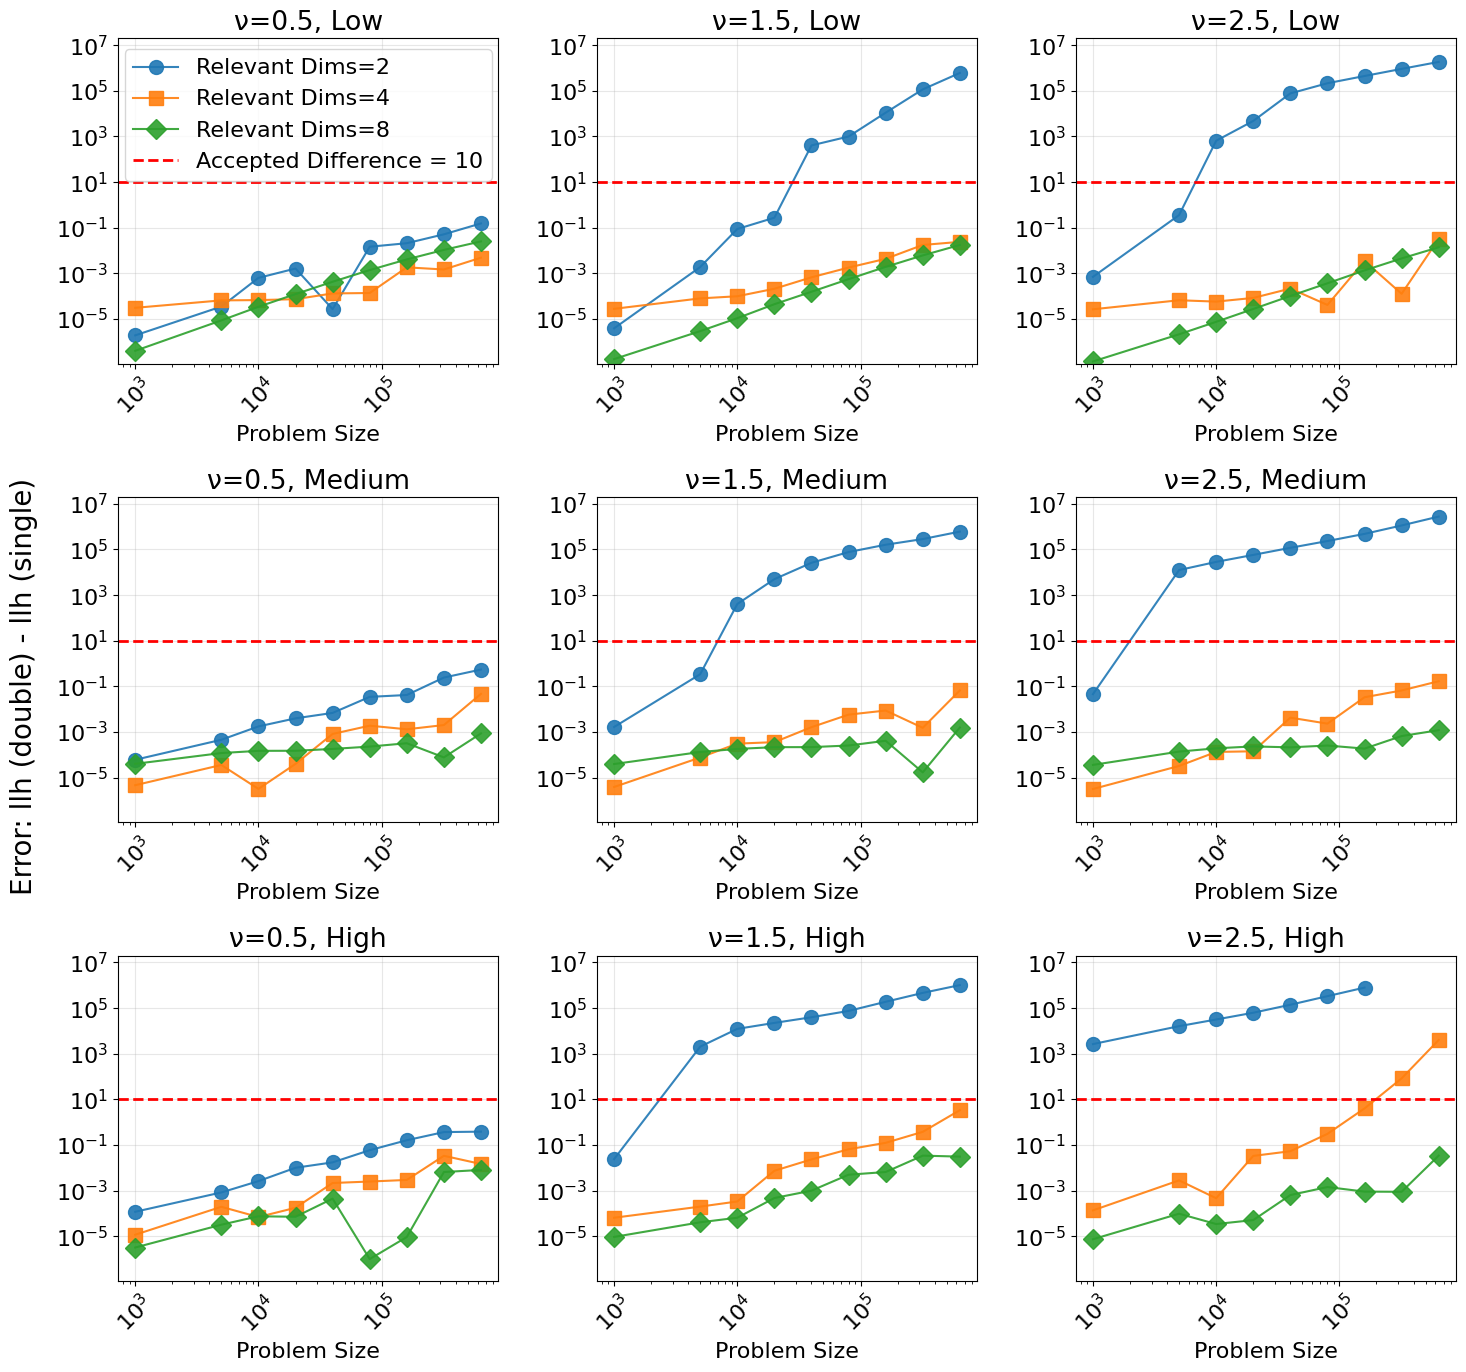

In [31]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

# Create 9 subplots for comparison
fig, axes = plt.subplots(3, 3, figsize=(15, 14),  constrained_layout=True)

# Flatten axes for easier indexing
axes = axes.flatten()
markers = ['o', 's', 'D', 'v', '^', 'P', 'H', 'X', 'd']

# Calculate the global min and max for consistent y-axis range
all_differences = []
for i in range(9):
    single_kl = single_data_llh_N[i]
    double_kl = double_data_llh_N[i]
    for j in range(len(dims)):
        _differences = np.abs(np.array(double_kl[j]) - np.array(single_kl[j]))  # Use absolute values for log scale
        all_differences.extend(_differences)

# Set global y-axis limits for log scale
y_min = min(all_differences)
y_max = max(all_differences)

for i in range(9):
    ax = axes[i]
    
    # Get the data for this parameter set
    single_kl = single_data_llh_N[i]
    double_kl = double_data_llh_N[i]
    
    # Plot absolute difference (required for log scale)
    for j in range(len(dims)):    
        differences = np.abs(np.array(double_kl[j]) - np.array(single_kl[j]))
        ax.plot(N, differences, marker = markers[j], linestyle = '-', alpha=0.9, markersize=10, label=f'Relevant Dims={dims[j]}')
    
    ax.axhline(y=10, xmax=max(N), color='red', linestyle='--', linewidth=2, label='Accepted Difference = 10')
    # Set logarithmic y-axis
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    # Set consistent y-axis range for all subplots
    ax.set_ylim(y_min * 0.8, y_max * 7.2)  # Add small buffer
    
    # Set labels and title
    ax.set_xlabel('Problem Size')    
    ax.set_title(f'ν={nu[i]}, {range_str[i]}')
    if i == 0:
        ax.legend(loc='upper center')
    ax.grid(True, alpha=0.3)
    
    # Set x-axis to show all m_bv values
    # ax.set_xticks(m_bv[::2])  # Show every other tick to avoid crowding
    ax.tick_params(axis='x', rotation=45)

# Add figure-wide y-label with custom positioning
# fig.text(-0.01, 0.5, 'llh (double) - llh (single)', va='center', rotation='vertical', fontsize=20)
fig.supylabel('Error: llh (double) - llh (single)', fontsize=20, x=0.02)

plt.tight_layout()
# fig.subplots_adjust(left=0.1)   # expand left margin so ylabel fits
plt.savefig('./fig/GPspatial_N.pdf')#, dpi=300)
plt.show()